<a href="https://www.kaggle.com/code/omkarm0542/json-tabulate-word-cloud?scriptVersionId=122896230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wordd-cloud/Youtube05-Shakira.csv
/kaggle/input/wordd-cloud/Youtube03-LMFAO.csv
/kaggle/input/wordd-cloud/Youtube02-KatyPerry.csv
/kaggle/input/wordd-cloud/Youtube01-Psy.csv
/kaggle/input/wordd-cloud/Youtube04-Eminem.csv
/kaggle/input/vdsgsgrgregvhgehg/mtcars.csv
/kaggle/input/vdsgsgrgregvhgehg/hours.csv
/kaggle/input/vdsgsgrgregvhgehg/superheroes.json
/kaggle/input/vdsgsgrgregvhgehg/Iris (1).csv
/kaggle/input/vdsgsgrgregvhgehg/ecom_sales.csv
/kaggle/input/vdsgsgrgregvhgehg/Iris.csv
/kaggle/input/vdsgsgrgregvhgehg/nba.csv
/kaggle/input/vdsgsgrgregvhgehg/sample.xlsx


In [2]:
import json
 
with open('/kaggle/input/vdsgsgrgregvhgehg/superheroes.json') as f:
    superHeroSquad = json.load(f)
type(superHeroSquad)
# Output: dict


dict

In [3]:
superHeroSquad

{'squadName': 'Super Hero Squad',
 'homeTown': 'Metro City',
 'formed': 2016,
 'secretBase': 'Super tower',
 'active': True,
 'members': [{'name': 'Molecule Man',
   'age': 29,
   'secretIdentity': 'Dan Jukes',
   'powers': ['Radiation resistance', 'Turning tiny', 'Radiation blast']},
  {'name': 'Madame Uppercut',
   'age': 39,
   'secretIdentity': 'Jane Wilson',
   'powers': ['Million tonne punch',
    'Damage resistance',
    'Superhuman reflexes']},
  {'name': 'Eternal Flame',
   'age': 1000000,
   'secretIdentity': 'Unknown',
   'powers': ['Immortality',
    'Heat Immunity',
    'Inferno',
    'Teleportation',
    'Interdimensional travel']}]}

In [4]:
superHeroSquad.keys()
# Output: dict_keys(['squadName', 'homeTown', 'formed', 'secretBase', 'active', 'members'])

dict_keys(['squadName', 'homeTown', 'formed', 'secretBase', 'active', 'members'])

In [5]:
superHeroSquad['members'][0]['powers'][2]

'Radiation blast'

In [6]:
import pandas as pd
df = pd.read_json("/kaggle/input/vdsgsgrgregvhgehg/superheroes.json")

In [7]:
df

,squadName,homeTown,formed,secretBase,active,members
0,Super Hero Squad,Metro City,2016,Super tower,True,"{'name': 'Molecule Man', 'age': 29, 'secretIde..."
1,Super Hero Squad,Metro City,2016,Super tower,True,"{'name': 'Madame Uppercut', 'age': 39, 'secret..."
2,Super Hero Squad,Metro City,2016,Super tower,True,"{'name': 'Eternal Flame', 'age': 1000000, 'sec..."


In [8]:
df['members']

0    {'name': 'Molecule Man', 'age': 29, 'secretIde...
1    {'name': 'Madame Uppercut', 'age': 39, 'secret...
2    {'name': 'Eternal Flame', 'age': 1000000, 'sec...
Name: members, dtype: object

In [9]:
df['members'].apply(pd.Series)


,name,age,secretIdentity,powers
0,Molecule Man,29,Dan Jukes,"[Radiation resistance, Turning tiny, Radiation..."
1,Madame Uppercut,39,Jane Wilson,"[Million tonne punch, Damage resistance, Super..."
2,Eternal Flame,1000000,Unknown,"[Immortality, Heat Immunity, Inferno, Teleport..."


In [10]:
pd.json_normalize(superHeroSquad, record_path = ["members"], meta = ["squadName", "homeTown", "formed", "secretBase", "active"])

,name,age,secretIdentity,powers,squadName,homeTown,formed,secretBase,active
0,Molecule Man,29,Dan Jukes,"[Radiation resistance, Turning tiny, Radiation...",Super Hero Squad,Metro City,2016,Super tower,True
1,Madame Uppercut,39,Jane Wilson,"[Million tonne punch, Damage resistance, Super...",Super Hero Squad,Metro City,2016,Super tower,True
2,Eternal Flame,1000000,Unknown,"[Immortality, Heat Immunity, Inferno, Teleport...",Super Hero Squad,Metro City,2016,Super tower,True


In [11]:
superHeroSquad

{'squadName': 'Super Hero Squad',
 'homeTown': 'Metro City',
 'formed': 2016,
 'secretBase': 'Super tower',
 'active': True,
 'members': [{'name': 'Molecule Man',
   'age': 29,
   'secretIdentity': 'Dan Jukes',
   'powers': ['Radiation resistance', 'Turning tiny', 'Radiation blast']},
  {'name': 'Madame Uppercut',
   'age': 39,
   'secretIdentity': 'Jane Wilson',
   'powers': ['Million tonne punch',
    'Damage resistance',
    'Superhuman reflexes']},
  {'name': 'Eternal Flame',
   'age': 1000000,
   'secretIdentity': 'Unknown',
   'powers': ['Immortality',
    'Heat Immunity',
    'Inferno',
    'Teleportation',
    'Interdimensional travel']}]}

In [12]:
#accessing the data
superHeroSquad["members"][2]["secretIdentity"]


'Unknown'

In [13]:
#update secret identity of Eternal Flame
superHeroSquad["members"][2]["secretIdentity"] = 'Will Smith'
with open('superheroes.json', 'w') as file:
    json.dump(superHeroSquad, file)

In [14]:
superHeroSquad

{'squadName': 'Super Hero Squad',
 'homeTown': 'Metro City',
 'formed': 2016,
 'secretBase': 'Super tower',
 'active': True,
 'members': [{'name': 'Molecule Man',
   'age': 29,
   'secretIdentity': 'Dan Jukes',
   'powers': ['Radiation resistance', 'Turning tiny', 'Radiation blast']},
  {'name': 'Madame Uppercut',
   'age': 39,
   'secretIdentity': 'Jane Wilson',
   'powers': ['Million tonne punch',
    'Damage resistance',
    'Superhuman reflexes']},
  {'name': 'Eternal Flame',
   'age': 1000000,
   'secretIdentity': 'Will Smith',
   'powers': ['Immortality',
    'Heat Immunity',
    'Inferno',
    'Teleportation',
    'Interdimensional travel']}]}

In [15]:
#Saving in a prettier way
with open('superheroes.json', 'w') as file:
    json.dump(superHeroSquad, file, indent = 4)

****Tabulate****

In [16]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tabulate import tabulate


In [18]:
table = [['First Name', 'Last Name', 'Age'], ['John', 'Smith', 39], ['Mary', 'Jane', 25], ['Jennifer', 'Doe', 28]]

In [19]:
table

[['First Name', 'Last Name', 'Age'],
 ['John', 'Smith', 39],
 ['Mary', 'Jane', 25],
 ['Jennifer', 'Doe', 28]]

In [20]:
print(tabulate(table))


----------  ---------  ---
First Name  Last Name  Age
John        Smith      39
Mary        Jane       25
Jennifer    Doe        28
----------  ---------  ---


In [21]:
print(tabulate(table, headers='firstrow'))


First Name    Last Name      Age
------------  -----------  -----
John          Smith           39
Mary          Jane            25
Jennifer      Doe             28


In [22]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))


+--------------+-------------+-------+
| First Name   | Last Name   |   Age |
+==============+=============+=======+
| John         | Smith       |    39 |
+--------------+-------------+-------+
| Mary         | Jane        |    25 |
+--------------+-------------+-------+
| Jennifer     | Doe         |    28 |
+--------------+-------------+-------+


In [23]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒══════════════╤═════════════╤═══════╕
│ First Name   │ Last Name   │   Age │
╞══════════════╪═════════════╪═══════╡
│ John         │ Smith       │    39 │
├──────────────┼─────────────┼───────┤
│ Mary         │ Jane        │    25 │
├──────────────┼─────────────┼───────┤
│ Jennifer     │ Doe         │    28 │
╘══════════════╧═════════════╧═══════╛


Word Cloud

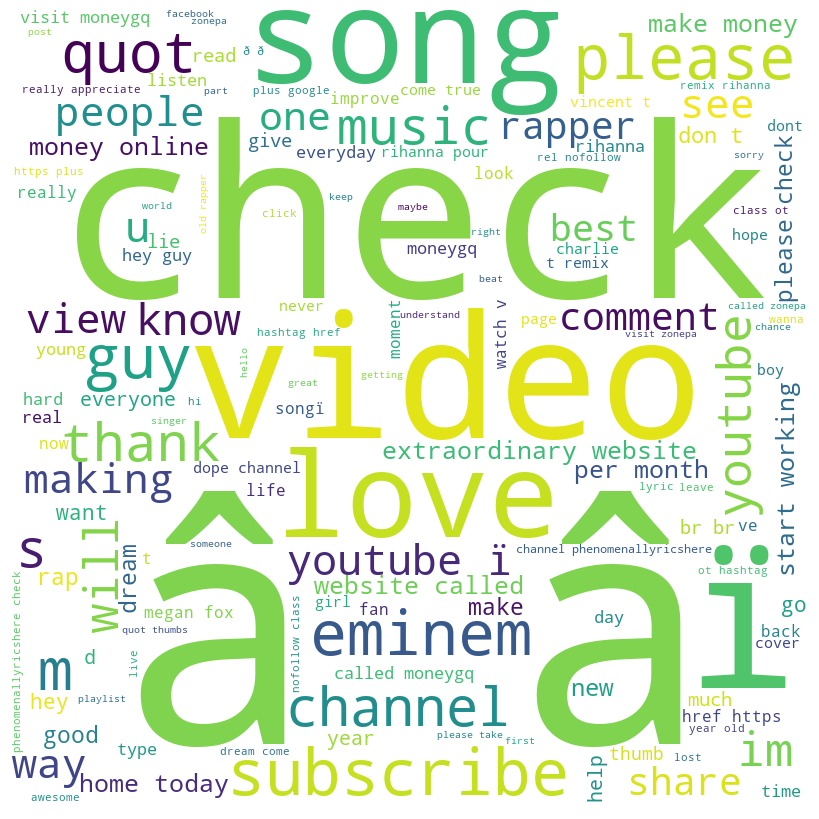

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/kaggle/input/wordd-cloud/Youtube04-Eminem.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()